# Random Behaviour of Assets

## Additional Resources

Aroussi, R. (2019): yfinance, https://pypi.org/project/yfinance/

Github Repository: https://github.com/ranaroussi/yfinance

Smigel, L. (2023): yfinance python tutorial (2023), https://analyzingalpha.com/yfinance-python

## Inplementation in Python

In [3]:
# Import libraries and packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [11]:
# Get adjusted closing prices for Apple

apple = yf.download('AAPL', start = '2010-01-01', \
                            end = '2022-12-31', \
                            interval = '1d', \
                            auto_adjust = True)['Close']
apple.info()
apple


[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.series.Series'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3272 non-null   float64
dtypes: float64(1)
memory usage: 51.1 KB


Date
2010-01-04      6.478998
2010-01-05      6.490199
2010-01-06      6.386965
2010-01-07      6.375155
2010-01-08      6.417540
                 ...    
2022-12-23    131.127060
2022-12-27    129.307236
2022-12-28    125.339417
2022-12-29    128.889572
2022-12-30    129.207794
Name: Close, Length: 3272, dtype: float64

In [12]:
# Convert series to pandas dataframe

apple = apple.to_frame()
apple

,Close
Date,
2010-01-04,6.478998
2010-01-05,6.490199
2010-01-06,6.386965
2010-01-07,6.375155
2010-01-08,6.417540
...,...
2022-12-23,131.127060
2022-12-27,129.307236
2022-12-28,125.339417


In [13]:
# Rename column

apple = apple.rename(columns = {'Close': 'price'})
apple

,price
Date,
2010-01-04,6.478998
2010-01-05,6.490199
2010-01-06,6.386965
2010-01-07,6.375155
2010-01-08,6.417540
...,...
2022-12-23,131.127060
2022-12-27,129.307236
2022-12-28,125.339417


Text(0, 0.5, 'Price ($USD$)')

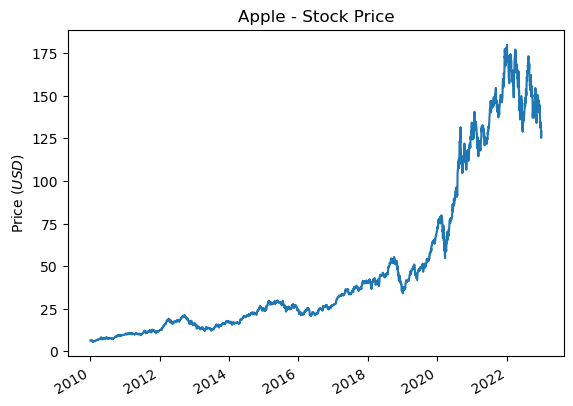

In [14]:
# Plot stock price

apple['price'].plot(legend = None)
plt.title('Apple - Stock Price')
plt.xlabel('')
plt.ylabel('Price ($USD$)')

In [15]:
# Calculate returns

## Discrete returns
apple['discrete_return'] = apple['price'].pct_change() * 100

## Continuous returns
apple['continuous_return'] = (np.log(apple['price'] / apple['price'].shift(1))) * 100

In [16]:
apple

,price,discrete_return,continuous_return
Date,,,
2010-01-04,6.478998,NaN,NaN
2010-01-05,6.490199,0.172880,0.172731
2010-01-06,6.386965,-1.590618,-1.603404
2010-01-07,6.375155,-0.184898,-0.185069
2010-01-08,6.417540,0.664833,0.662633
...,...,...,...
2022-12-23,131.127060,-0.279821,-0.280213
2022-12-27,129.307236,-1.387833,-1.397553
2022-12-28,125.339417,-3.068521,-3.116586


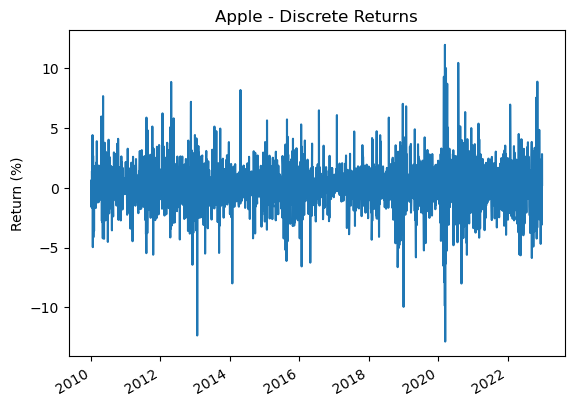

In [17]:
# Plot returns

## Discrete returns
apple['discrete_return'].plot(legend = None)
plt.title('Apple - Discrete Returns')
plt.xlabel('')
plt.ylabel('Return (%)')
plt.show();


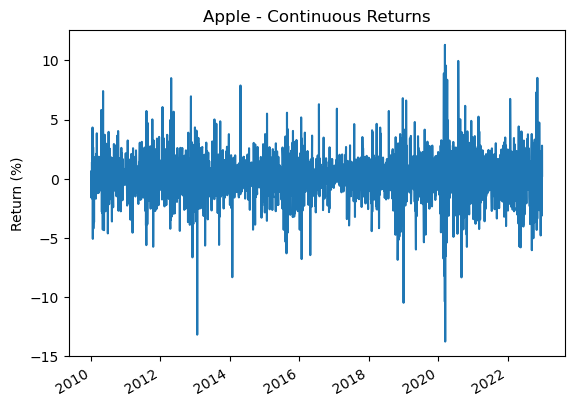

In [18]:
# Plot returns

## Continuous returns
apple['continuous_return'].plot(legend = None)
plt.title('Apple - Continuous Returns')
plt.xlabel('')
plt.ylabel('Return (%)')
plt.show();

In [22]:
# Moments of return distribution

## Discrete returns
apple['discrete_return'].describe()


count    3271.000000
mean        0.107909
std         1.808926
min       -12.864713
25%        -0.757829
50%         0.089313
75%         1.065616
max        11.980835
Name: discrete_return, dtype: float64

In [23]:
apple['discrete_return'].skew()

-0.05641050890298249

In [25]:
apple['discrete_return'].kurt()

5.107853856271599

In [20]:
# Moments of return distribution

## Continuous returns
apple['continuous_return'].describe()

count    3271.000000
mean        0.091497
std         1.810041
min       -13.770825
25%        -0.760715
50%         0.089273
75%         1.059979
max        11.315755
Name: continuous_return, dtype: float64

In [26]:
apple['continuous_return'].skew()

-0.2518498611639717

In [27]:
apple['continuous_return'].kurt()

5.367899668634284

Text(0, 0.5, 'Frequency')

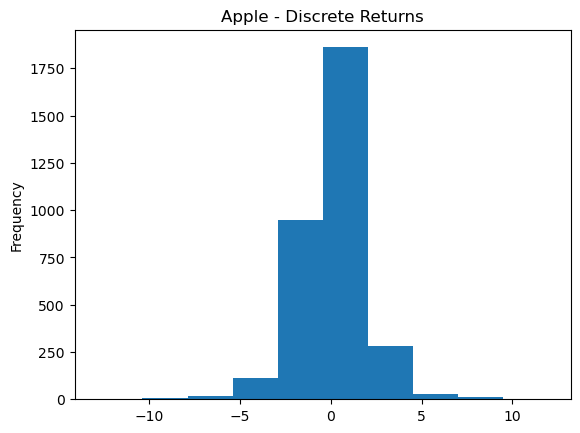

In [28]:
# Plot histogram of returns

## Discrete returns
apple['discrete_return'].plot(kind = 'hist')
plt.title('Apple - Discrete Returns')

# plt.xlabel('Returns)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

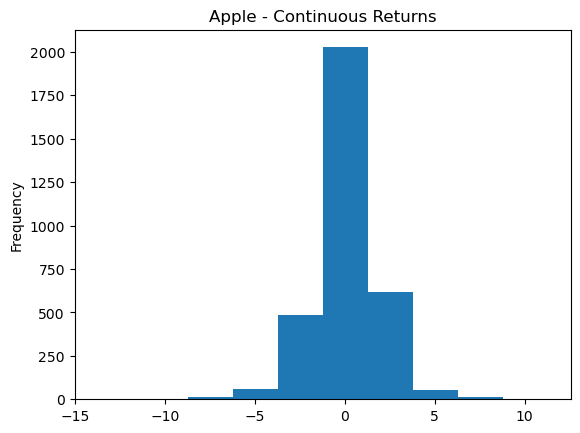

In [29]:
# Plot histogram of returns

## Continous returns
apple['continuous_return'].plot(kind = 'hist')
plt.title('Apple - Continuous Returns')

# plt.xlabel('Returns)
plt.ylabel('Frequency')

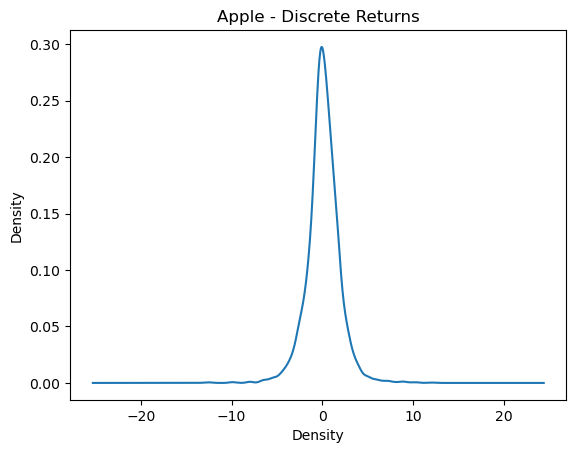

In [30]:
# Plot density of returns

## Discrete returns
apple['discrete_return'].plot(kind = 'kde')
plt.title('Apple - Discrete Returns')
plt.xlabel('Density');

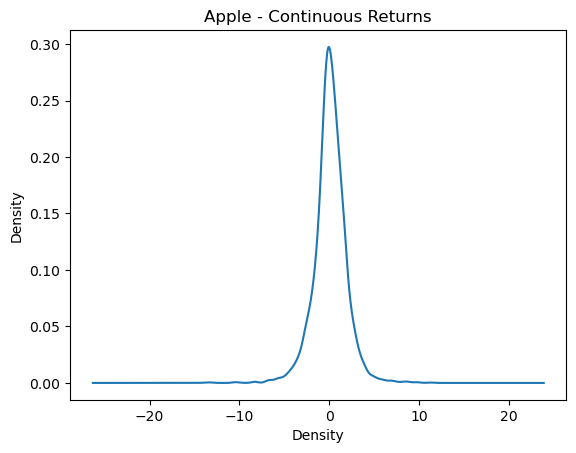

In [33]:
# Plot density of returns

## Continous returns
apple['continuous_return'].plot(kind = 'kde')
plt.title('Apple - Continuous Returns')
plt.xlabel('Density')
plt.show;

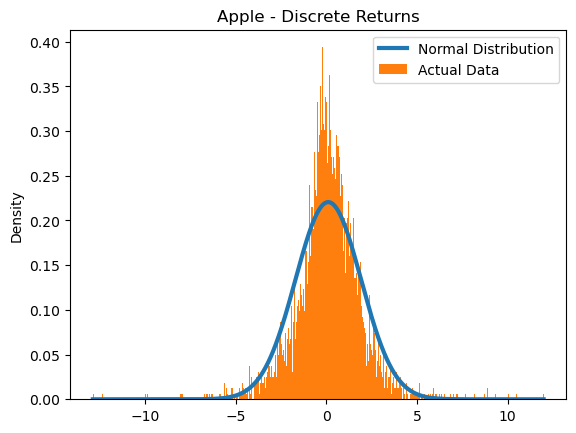

In [39]:
# Plot histogram of returns together with normal distribution

## Discrete returns
### Setup range
xs = np.arange(apple['discrete_return'].min(), apple['discrete_return'].max(), 0.01)

### Fit normal distribution to data and get mean standard deviation
fit = stats.norm.pdf(xs, np.mean(apple['discrete_return']), np.std(apple['discrete_return']))

plt.plot(xs, fit, label = 'Normal Distribution', lw = 3)
plt.hist(apple['discrete_return'], 500, density = True, label = 'Actual Data')
plt.title('Apple - Discrete Returns')
plt.xlabel('')
plt.ylabel('Density')
plt.legend();

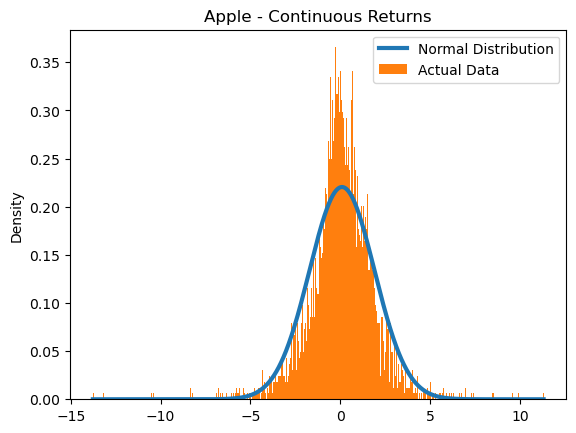

In [40]:
# Plot histogram of returns together with normal distribution

## Continuous returns
### Setup range
xs = np.arange(apple['continuous_return'].min(), apple['continuous_return'].max(), 0.01)

### Fit normal distribution to data and get mean standard deviation
fit = stats.norm.pdf(xs, np.mean(apple['continuous_return']), np.std(apple['continuous_return']))

plt.plot(xs, fit, label = 'Normal Distribution', lw = 3)
plt.hist(apple['continuous_return'], 500, density = True, label = 'Actual Data')
plt.title('Apple - Continuous Returns')
plt.xlabel('')
plt.ylabel('Density')
plt.legend();

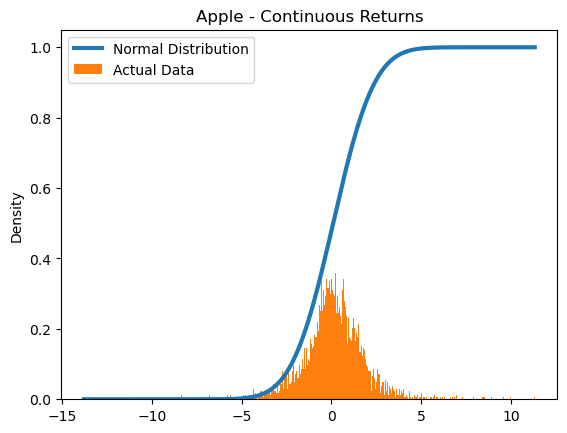

In [43]:
# Plot histogram of returns together with normal distribution

## Continuous returns
### Setup range
xs = np.arange(apple['continuous_return'].min(), apple['continuous_return'].max(), 0.01)

### Fit normal distribution to data and get mean standard deviation
fit_1 = stats.norm.cdf(xs, np.mean(apple['continuous_return']), np.std(apple['continuous_return']))
plt.plot(xs, fit_1, label = 'Normal Distribution', lw = 3)
plt.hist(apple['continuous_return'], 500, density = True, label = 'Actual Data')
plt.title('Apple - Continuous Returns')
plt.xlabel('')
plt.ylabel('Density')
plt.legend();